<a href="https://colab.research.google.com/github/ksizorCode/visionado/blob/main/%F0%9F%91%95%F0%9F%91%95%F0%9F%91%95ClasificadorCamisetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar librerías

import tensorflow as tf
import tensorflow_datasets as tfds

datos,metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
nombres_clases = metadatos.features['label'].names

In [ ]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#normalizar los datos (Pasar de 0-255 a 0-1)

def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #Aquí lo pasa de 0-255 a 0-1
    return imagenes, etiquetas

    #Normalizar los datos de entrenamiento y pruebas con la función que hicimos
    datos_entrenamiento = datos_entrenamiento.map(normalizar)
    datos_pruebas = datos_pruebas.map(normalizar)

    # Agregar a cache (usar memoria en lugar de disco, entrenameinto más rápido)
    datos_entrenamiento = datos_entrenamiento.cache()
    datos_pruebas = datos_pruebas.cache()

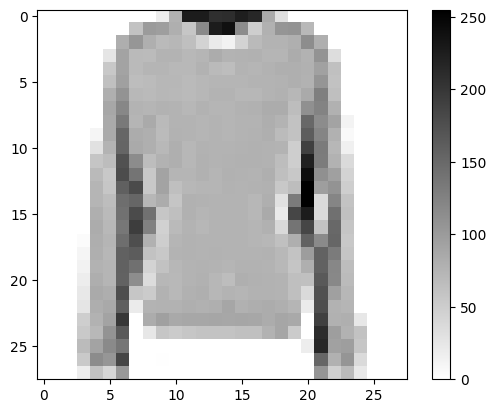

In [ ]:
# Mostrar una imagen de los datos de pruebas, de momento mostremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1): # Especifica que tome 1 elemento
    break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar el array

import matplotlib.pyplot as plt

#Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

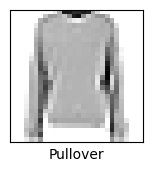

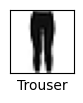

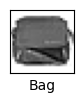

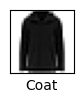

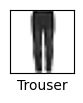

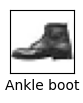

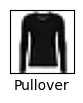

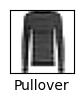

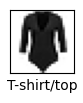

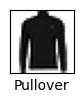

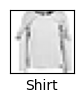

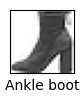

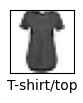

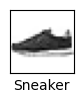

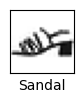

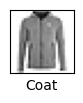

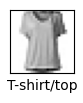

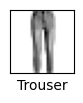

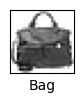

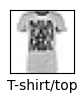

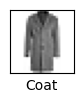

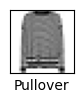

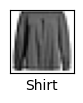

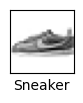

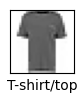

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiqueta])
    plt.show()

In [ ]:
# Clear el Modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificación
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compilar el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_examples).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

# Definir num_examples antes de usarlo
num_examples = metadatos.splits['train'].num_examples

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_examples/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6516 - loss: 5.1760
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7765 - loss: 0.6796
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7994 - loss: 0.6099
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8122 - loss: 0.5626
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8250 - loss: 0.5078


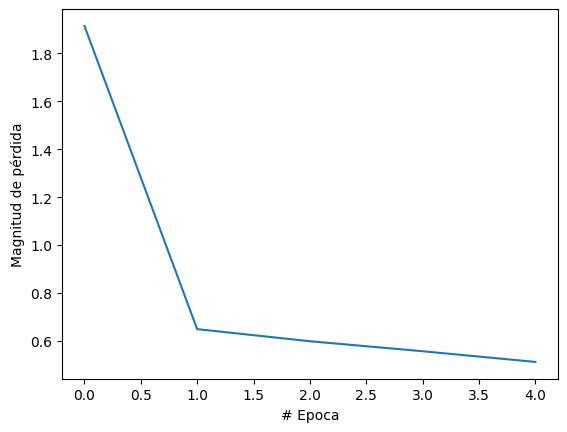

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


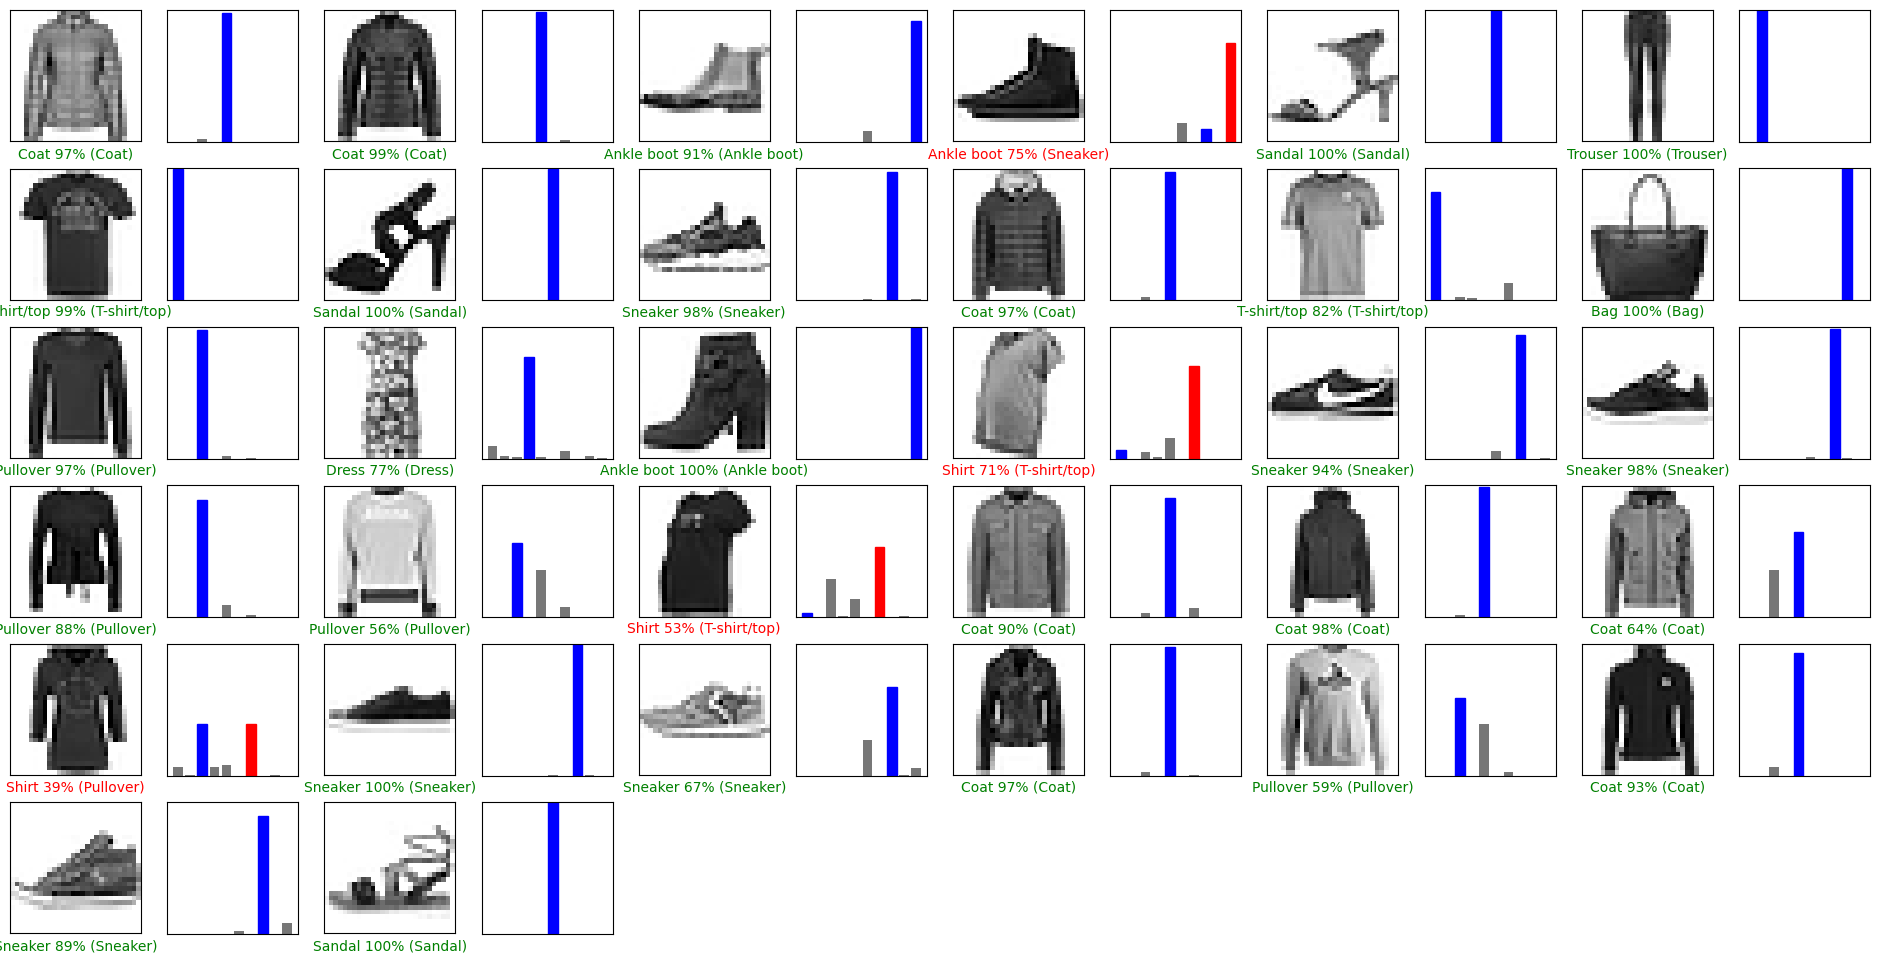

In [ ]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np
import matplotlib.pyplot as plt # Asegurarse de importar matplotlib.pyplot

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 6
columnas = 6
# Limitar el número de imágenes a mostrar al tamaño del lote para evitar IndexError
num_imagenes_a_mostrar = TAMANO_LOTE # O puedes ajustar filas y columnas para que filas * columnas <= TAMANO_LOTE

plt.figure(figsize=(2*2*columnas, 2*filas))
# Iterar solo hasta el número de imágenes disponibles en el lote
for i in range(num_imagenes_a_mostrar):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

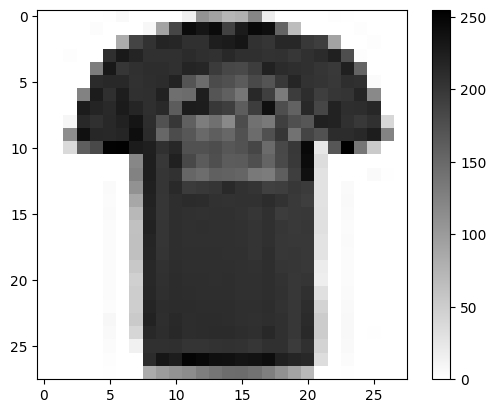

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediccion: T-shirt/top


In [ ]:
# 👖🩳 Prueba a cambiar aquí el valor numérico correspondiente a las imágenes mostradas anteriormente
#Probar una imagen suelta
imagen = imagenes_prueba[6] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh

# Display the image
plt.figure()
plt.imshow(imagen[..., 0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])



Saving panta2.jpg to panta2 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
La prenda es: Shirt


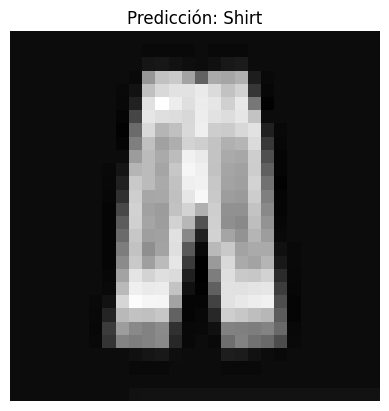

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image

# Asegúrate de que la función normalizar haya sido aplicada previamente a los datos de entrenamiento y prueba.
# Si no fue así, ejecuta las celdas correspondientes en tu notebook.

uploaded = files.upload()

for filename in uploaded.keys():
  img = Image.open(filename).convert('L').resize((28, 28)) # Convertir a escala de grises y redimensionar
  img_array = np.array(img)

  # Aplicar la misma normalización que se usó en el entrenamiento
  img_array = tf.cast(img_array, tf.float32) # Convertir a float32
  img_array /= 255.0 # Normalizar a 0-1

  img_array = img_array.numpy().reshape((1, 28, 28, 1)) # Añadir dimensiones de lote y canal

  prediccion = modelo.predict(img_array)
  print(f"La prenda es: {nombres_clases[np.argmax(prediccion[0])]}")

  plt.figure()
  # Para visualizar, podemos usar la imagen original antes de añadir las dimensiones de lote y canal
  plt.imshow(img_array[0, ..., 0], cmap='gray_r')
  plt.title(f"Predicción: {nombres_clases[np.argmax(prediccion[0])]}")
  plt.axis('off')
  plt.show()